# Ejercicios y Problemas.

1.1 Encontrar, usando el método de AGs, la raíz real del polinomio P(x) = 5x5- 3x4-x3-5x2-x-3 en el
intervalo [0.5 1], usando números reales, una población de 100 listas, un solo tipo de cruce y
selección por clasificación. Dibuje un cuadro de aptitud contra generación.

Adaptación del codigo creado por Andrés Holguín & Sara Jimenez

In [7]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [8]:
len_chrom = 100
K = 10
M = 200
pm = 1/len_chrom

def equation(x):
    return (5*x**5) - (3*x**4) - (x**3) - (5*x**2) - x - 3
    
def generate_population(K, len_chrom):
    population = np.random.randint(2, size=(K, len_chrom))
    return population
    
def evaluate_fitness(population):
    x_values = np.zeros(K, dtype=float)
    probabilities = np.zeros(K, dtype=float) 
    aptitudes = np.zeros(K, dtype=float) 
  
    for i in range(K):
        t, x = function_result(population[i])
        x_values[i] = x
        aptitudes[i] = (10 - abs(t)) * 100
        
    total_aptitude = float(np.sum(aptitudes))
    probabilities = [apt / total_aptitude for apt in aptitudes]
    max_prob_index = np.argmax(probabilities)
    probabilities[max_prob_index] = 0.99
    
    return probabilities, x_values, max(aptitudes)
    
def function_result(chromosome):
    x = decode(chromosome)
    func_value = equation(x)
    return func_value, x

def decode(chromosome):
    xi = 0.5  
    xf = 1  
    Max = 2 ** len_chrom
    chrom_pot = [chromosome[i] * 2 ** (len_chrom - i - 1) for i in range(len_chrom)]
    decimal_value = sum(chrom_pot) 
    chrom_pot = 0
    decoded_value = ((xf - xi) / Max) * decimal_value + xi 
    return decoded_value

In [9]:
def crossover(population, probabilities): 
    max_prob_index = np.argmax(probabilities)
    
    i = 0
    while i < K - 1:
        best_chrom = population[max_prob_index]
        
        if probabilities[i] < 0.97:
            rand = random.randint(2, len_chrom - 1)  
            parent1 = population[i]
            parent2 = population[i + 1]
            j = rand
            while j < len_chrom:
                bit = parent1[j]
                parent1[j] = parent2[j]
                parent2[j] = bit
                j += 1  
        else:
            if max_prob_index % 2 == 0:
                population[i] = best_chrom
            else:
                population[i + 1] = best_chrom 
        i += 2
    return population
    
def mutation(population, pm):
    total_bits = K * len_chrom
    segment = 1 / pm
    n_segments = total_bits / segment
    i = 0
    while i < n_segments - 1:
        aleatory = random.randint(0, segment - 1)
        pos = int(i * segment + aleatory)
        y = int((pos / len_chrom))
        chromosome = population[y]
        x = pos - len_chrom * y 
        if chromosome[x - 1] == 0:
            chromosome[x - 1] = 1
        else:
            chromosome[x - 1] = 0
        i += 1    
    return population
    
def roulette_selection(population, probabilities):
    chosen = []
    while len(chosen) < K:
        r = random.random()
        for (i, individual) in enumerate(population):
            if r <= probabilities[i]:
                chosen.append(list(individual))
                break
    return chosen

Generation  0 Best x 0.5043052866880386 best solution  -4.935129206145591
Generation  1 Best x 0.5043052866880386 best solution  -4.935129206145591
Generation  2 Best x 0.5040611460630386 best solution  -4.9334868846262045
Generation  3 Best x 0.5040592387144058 best solution  -4.933474056185972
Generation  4 Best x 0.5040592387141785 best solution  -4.933474056184443
Generation  5 Best x 0.5040592312635979 best solution  -4.933474006073416
Generation  6 Best x 0.5040589928450188 best solution  -4.933472402520799
Generation  7 Best x 0.5040589928449903 best solution  -4.933472402520607
Generation  8 Best x 0.5040589928449903 best solution  -4.933472402520607
Generation  9 Best x 0.5040588736357008 best solution  -4.9334716007444985
Generation  10 Best x 0.5040588734028701 best solution  -4.93347159917853
Generation  11 Best x 0.504058871540225 best solution  -4.933471586650779
Generation  12 Best x 0.504058871536587 best solution  -4.933471586626311
Generation  13 Best x 0.504058871536

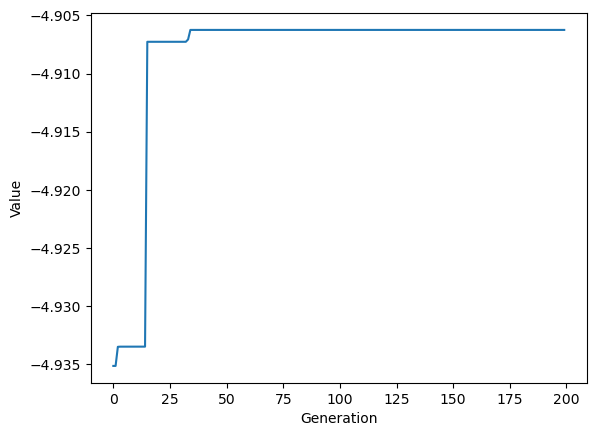

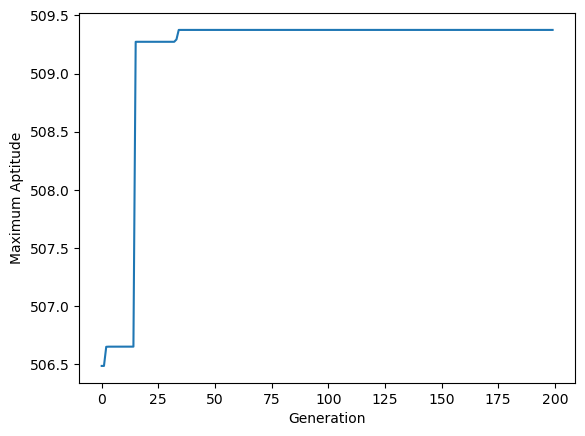

In [10]:
population3 = generate_population(K, len_chrom) 
prob_chromosome, x_values, AptI = evaluate_fitness(population3)
i = 0

Px = []
Py = []
PaptI = []

while i < M:
    old_population = population3
    new_population1 = roulette_selection(old_population, prob_chromosome)
    new_population2 = crossover(new_population1, prob_chromosome)
    population3 = mutation(new_population2, pm)
    prob_chromosome, x_values, AptI = evaluate_fitness(population3)
    max_prob = np.amax(prob_chromosome)
    max_prob_index = np.argmax(prob_chromosome)
    best_x = x_values[max_prob_index]
    value = equation(best_x)
    print("Generation ", i, "Best x", best_x, "best solution ", value)
    if abs(value) < 0.00001:
        print()
        print("Best Solution x", best_x, " with F(x) = ", value)
        i = M
    Px.append(i)
    Py.append(value)
    PaptI.append(AptI)
    i += 1

plt.plot(Px, Py)
plt.xlabel('Generation')
plt.ylabel('Value')
plt.show()

plt.plot(Px, PaptI)
plt.xlabel('Generation')
plt.ylabel('Maximum Aptitude')
plt.show()

1.2 Suponga que tiene una lista de 15 alimentos con número de calorías, gramos de proteína,
gramos de grasa y gramos de carbohidratos. Suponga que un individuo debe consumir determinada
cantidad de calorías, proteínas, grasa y carbohidratos. Genere una dieta para ese individuo.

# Optimización de la Dieta con Algoritmo Genético

Este ejercicio es una implementación de un algoritmo genético para optimizar un plan de dieta que cumpla con requisitos nutricionales específicos. El código se ha desarrollado en Python y se utiliza para encontrar un plan de dieta que se acerque lo más posible a las metas de calorías, proteínas, grasas y carbohidratos definidas por el usuario.

## Cómo Utilizar

1. Clona o descarga este repositorio a tu máquina local.

2. Ejecuta el código de el jupyter notebook en tu entorno Python.

3. Ajusta los parámetros según tus necesidades:

   - `target_calories`: Define el objetivo de calorías para tu dieta.
   - `target_protein`: Define el objetivo de proteínas en gramos.
   - `target_fat`: Define el objetivo de grasas en gramos.
   - `target_carbs`: Define el objetivo de carbohidratos en gramos.
   - `population_size`: Tamaño de la población de planes de dieta.
   - `mutation_rate`: Tasa de mutación para la introducción de variabilidad en la población.
   - `generations`: Número de generaciones o iteraciones del algoritmo.

4. Ejecuta el código y observa cómo evoluciona la población de planes de dieta hacia una solución óptima.

5. Una vez que el algoritmo haya terminado, se imprimirá el plan de dieta óptimo y los valores nutricionales alcanzados.

## Estructura del Código

- `initialize_population()`: Inicializa una población de planes de dieta aleatorios.
- `calculate_fitness(diet_plan)`: Calcula la aptitud de un plan de dieta en función de su proximidad a los objetivos nutricionales.
- `crossover(parent1, parent2)`: Realiza el cruce (crossover) entre dos planes de dieta para generar descendencia.
- `mutate(diet_plan)`: Aplica mutaciones a un plan de dieta.
- Bucle principal del Algoritmo Genético: Evoluciona la población de planes de dieta a lo largo de varias generaciones.
- `calculate_nutritional_values(diet_plan)`: Calcula los valores nutricionales totales para un plan de dieta dado.

## Resultados

Los resultados finales incluyen el plan de dieta óptimo, las comidas seleccionadas y los valores nutricionales totales, incluyendo proteínas, grasas, carbohidratos y calorías.

In [11]:
import pandas as pd

In [12]:
food_df = pd.read_csv('./nutrients_csvfile.csv', delimiter=',')

In [13]:
food_df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [14]:
shuffled_df = food_df.sample(frac=1, random_state=42)
menu_df = shuffled_df[:15]
menu_df = menu_df.replace('t', 0)
menu_df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
25,Swiss,1 oz.,28,105,7,8,7,0,0,Dairy products
109,Celery,1 cup,100,20,1,0,0,1,4,Vegetables A-E
76,Flounder,3 1/2 oz.,100,200,30,8,0,0,0,"Fish, Seafood"
196,Frozen,6-oz. can,210,330,2,0,0,0.4,78,Fruits G-P
57,Roasted chicken,3 1/2 oz.,100,290,25,20,16,0,0,"Meat, Poultry"
255,Spaghetti with meat sauce,1 cup,250,285,13,10,6,0.50,35,"Breads, cereals, fastfood,grains"
182,"Fruit cocktail, canned",1 cup,256,195,1,0,0,0.5,50,Fruits A-F
181,figs Canned with syrup,3,115,130,1,0,0,1,32,Fruits A-F
274,Apple betty,1 serving,100,150,1,4,0,0.5,29,"Desserts, sweets"
198,Peaches,1 cup,257,200,1,0,0,1,52,Fruits G-P


In [15]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 25 to 172
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      15 non-null     object
 1   Measure   15 non-null     object
 2   Grams     15 non-null     object
 3   Calories  15 non-null     object
 4   Protein   15 non-null     object
 5   Fat       15 non-null     object
 6   Sat.Fat   15 non-null     object
 7   Fiber     15 non-null     object
 8   Carbs     15 non-null     object
 9   Category  15 non-null     object
dtypes: object(10)
memory usage: 1.3+ KB


In [16]:
foods = menu_df.to_dict(orient='records')
foods

[{'Food': 'Swiss',
  'Measure': '1 oz.',
  'Grams': '28',
  'Calories': '105',
  'Protein': '7',
  'Fat': '8',
  'Sat.Fat': '7',
  'Fiber': '0',
  'Carbs': 0,
  'Category': 'Dairy products'},
 {'Food': 'Celery',
  'Measure': '1 cup',
  'Grams': '100',
  'Calories': '20',
  'Protein': '1',
  'Fat': 0,
  'Sat.Fat': '0',
  'Fiber': '1',
  'Carbs': '4',
  'Category': 'Vegetables A-E'},
 {'Food': 'Flounder',
  'Measure': '3 1/2 oz.',
  'Grams': '100',
  'Calories': '200',
  'Protein': '30',
  'Fat': '8',
  'Sat.Fat': '0',
  'Fiber': '0',
  'Carbs': '0',
  'Category': 'Fish, Seafood'},
 {'Food': 'Frozen ',
  'Measure': '6-oz. can',
  'Grams': '210',
  'Calories': '330',
  'Protein': '2',
  'Fat': 0,
  'Sat.Fat': 0,
  'Fiber': '0.4',
  'Carbs': '78',
  'Category': 'Fruits G-P'},
 {'Food': 'Roasted chicken',
  'Measure': '3 1/2 oz.',
  'Grams': '100',
  'Calories': '290',
  'Protein': '25',
  'Fat': '20',
  'Sat.Fat': '16',
  'Fiber': '0',
  'Carbs': '0',
  'Category': 'Meat, Poultry'},
 {'Foo

In [19]:
import random

# Define the target nutritional requirements
target_calories = 2000
target_protein = 70
target_fat = 50
target_carbs = 45

# Genetic Algorithm parameters
population_size = 100
mutation_rate = 0.01
generations = 100

def initialize_population():
    population = []
    for _ in range(population_size):
        diet_plan = [random.randint(0, 1) for _ in range(len(foods))]
        population.append(diet_plan)
    return population

def calculate_fitness(diet_plan):
    total_calories = sum(diet_plan[i] * int(foods[i]['Calories']) for i in range(len(foods)))
    total_protein = sum(diet_plan[i] * int(foods[i]['Protein']) for i in range(len(foods)))
    total_fat = sum(diet_plan[i] * int(foods[i]['Fat']) for i in range(len(foods)))
    total_carbs = sum(diet_plan[i] * int(foods[i]['Carbs']) for i in range(len(foods)))
    
    fitness = abs(total_calories - target_calories) + \
              abs(total_protein - target_protein) + \
              abs(total_fat - target_fat) + \
              abs(total_carbs - target_carbs)
    return fitness

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(foods) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(diet_plan):
    for i in range(len(diet_plan)):
        if random.random() < mutation_rate:
            diet_plan[i] = 1 - diet_plan[i]
    return diet_plan

# Main GA loop
population = initialize_population()

for generation in range(generations):
    population = sorted(population, key=lambda x: calculate_fitness(x))
    fittest_diet_plan = population[0]
    fitness = calculate_fitness(fittest_diet_plan)
    
    if fitness == 0:
        break
    
    new_population = [fittest_diet_plan]
    
    while len(new_population) < population_size:
        parent1, parent2 = random.choices(population[:10], k=2)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    
    population = new_population

# Calculate the sum of protein, carbohydrates, fat, and calories for the final diet plan
def calculate_nutritional_values(diet_plan):
    total_protein = sum(diet_plan[i] * int(foods[i]['Protein']) for i in range(len(foods)))
    total_fat = sum(diet_plan[i] * int(foods[i]['Fat']) for i in range(len(foods)))
    total_carbs = sum(diet_plan[i] * int(foods[i]['Carbs']) for i in range(len(foods)))
    total_calories = sum(diet_plan[i] * int(foods[i]['Calories']) for i in range(len(foods)))
    return total_protein, total_fat, total_carbs, total_calories

final_protein, final_fat, final_carbs, final_calories = calculate_nutritional_values(fittest_diet_plan)

# Print the final results
print("Optimal Diet Plan:")
print('----------------------------------------')
for i in range(len(foods)):
    if fittest_diet_plan[i] == 1:
        print(f"{foods[i]['Food']} - {foods[i]['Grams']} grams")

print('----------------------------------------')
print(f"Total Protein: {final_protein} grams")
print(f"Total Fat: {final_fat} grams")
print(f"Total Carbohydrates: {final_carbs} grams")
print(f"Total Calories: {final_calories} kcal")

Optimal Diet Plan:
----------------------------------------
Swiss - 28 grams
Flounder - 100 grams
Roasted chicken - 100 grams
Spaghetti with meat sauce - 250 grams
Peaches - 257 grams
Clams - 85 grams
(1/2 cup ice cream) - 540 grams
Split-pea soup - 250 grams
----------------------------------------
Total Protein: 120 grams
Total Fat: 74 grams
Total Carbohydrates: 184 grams
Total Calories: 2004 kcal


2. En el siguiente enlace se encuentra un programa Python para la solución del TSP (Traveling
Salesman Problem):
https://github.com/rocreguant/personal_blog/blob/main/Genetic_Algorithm_Python_Example/Traveling_Salesman_Problem.ipynb
Estúdielo y úselo como laboratorio, usando diferentes tipos de selección y diferente número de
generaciones. Imprima las gráficas correspondientes.